In [1]:
import pandas as pd

In [3]:
vt=pd.read_csv('vt_burlington.csv')


In [4]:
print(vt.head())

  raw_row_number        date      time  \
0           5223  2012-10-10  00:46:00   
1           5224  2012-10-10  00:57:00   
2           5225  2012-10-10  01:01:00   
3           5226  2012-10-10  01:32:00   
4           5227  2012-10-10  02:31:00   

                                          location        lat        lng  \
0          North Ave at Convent Sq, Burlington, VT  44.488673 -73.225712   
1       North St at N Winooski Ave, Burlington, VT  44.484809 -73.211471   
2            North Ave at North St, Burlington, VT  44.484429 -73.222334   
3  North Ave at Rt 127 exit, Burlington, VT, 05408        NaN        NaN   
4             Main St at Summit St, Burlington, VT  44.476286 -73.202400   

   subject_age subject_race subject_sex               department_name  ...  \
0         55.0        white        male  Burlington Police Department  ...   
1         22.0        white        male  Burlington Police Department  ...   
2         45.0        white        male  Burlington Poli

In [5]:
vt.isnull()

,raw_row_number,date,time,location,lat,lng,subject_age,subject_race,subject_sex,department_name,...,contraband_found,search_conducted,search_basis,reason_for_search,reason_for_stop,vehicle_registration_state,raw_race,raw_gender,raw_contraband_evidence,raw_outcome_of_stop
0,False,False,False,False,False,False,False,False,False,False,...,True,False,True,True,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,True,False,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,True,False,True,True,False,True,False,False,False,False
3,False,False,False,False,True,True,False,False,False,False,...,True,False,True,True,False,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,True,False,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31505,False,False,False,False,False,False,False,False,False,False,...,True,False,True,True,False,True,False,False,False,False
31506,False,False,False,False,False,False,False,False,False,False,...,True,False,True,True,False,True,False,False,False,False
31507,False,False,False,False,False,False,True,False,True,False,...,True,False,True,True,False,True,False,True,False,False
31508,False,False,False,False,False,False,False,False,False,False,...,True,False,True,True,False,True,False,False,False,False


In [6]:
vt.isnull().sum()


raw_row_number                    0
date                              0
time                              0
location                          0
lat                             407
lng                             407
subject_age                     622
subject_race                   1062
subject_sex                     796
department_name                   0
type                              0
violation                         2
arrest_made                     269
citation_issued                 269
warning_issued                  269
outcome                         281
contraband_found              31124
search_conducted                  0
search_basis                  31124
reason_for_search             31124
reason_for_stop                 418
vehicle_registration_state    26002
raw_race                       1040
raw_gender                      783
raw_contraband_evidence         449
raw_outcome_of_stop             269
dtype: int64

In [7]:
vt.drop('search_basis', axis='columns', inplace=True)

In [8]:
vt.drop('reason_for_search', axis='columns', inplace=True)

In [9]:
vt.shape

(31510, 24)

In [10]:
vt.drop('contraband_found', axis='columns', inplace=True)

In [11]:
vt.shape

(31510, 23)

In [12]:
vt.dtypes

raw_row_number                 object
date                           object
time                           object
location                       object
lat                           float64
lng                           float64
subject_age                   float64
subject_race                   object
subject_sex                    object
department_name                object
type                           object
violation                      object
arrest_made                    object
citation_issued                object
warning_issued                 object
outcome                        object
search_conducted                 bool
reason_for_stop                object
vehicle_registration_state     object
raw_race                       object
raw_gender                     object
raw_contraband_evidence        object
raw_outcome_of_stop            object
dtype: object

In [13]:
vt.date.str.replace('/', '-')

0        2012-10-10
1        2012-10-10
2        2012-10-10
3        2012-10-10
4        2012-10-10
            ...    
31505    2017-09-09
31506    2017-09-09
31507    2017-09-09
31508    2017-09-09
31509    2017-09-09
Name: date, Length: 31510, dtype: object

In [14]:
combined=vt.date.str.cat(vt.time, sep=' ')

In [15]:
vt['datetime']=pd.to_datetime(combined)

In [16]:
vt.set_index('datetime', inplace=True)

In [17]:
print(vt.index)

DatetimeIndex(['2012-10-10 00:46:00', '2012-10-10 00:57:00',
               '2012-10-10 01:01:00', '2012-10-10 01:32:00',
               '2012-10-10 02:31:00', '2012-10-10 05:58:00',
               '2012-10-10 06:09:00', '2012-10-10 08:21:00',
               '2012-10-10 08:21:00', '2012-10-10 08:33:00',
               ...
               '2017-09-09 01:36:00', '2017-09-09 09:27:00',
               '2017-09-09 10:05:00', '2017-09-09 20:16:00',
               '2017-09-09 20:28:00', '2017-09-09 21:59:00',
               '2017-09-09 22:51:00', '2017-09-09 23:01:00',
               '2017-09-09 23:16:00', '2017-09-09 23:44:00'],
              dtype='datetime64[ns]', name='datetime', length=31510, freq=None)


In [18]:
vt['arrest_made'] = vt.arrest_made.astype('bool')

In [19]:
print(vt.arrest_made.dtype)

bool


In [20]:
print(vt.citation_issued.head())

datetime
2012-10-10 00:46:00    False
2012-10-10 00:57:00    False
2012-10-10 01:01:00     True
2012-10-10 01:32:00    False
2012-10-10 02:31:00    False
Name: citation_issued, dtype: object


In [21]:
vt['citation_issued']=vt.citation_issued.astype('bool')

In [22]:
print(vt.warning_issued.head())

datetime
2012-10-10 00:46:00     True
2012-10-10 00:57:00     True
2012-10-10 01:01:00    False
2012-10-10 01:32:00     True
2012-10-10 02:31:00     True
Name: warning_issued, dtype: object


In [23]:
vt['warning_issued']=vt.warning_issued.astype('bool')

In [24]:
vt.dtypes

raw_row_number                 object
date                           object
time                           object
location                       object
lat                           float64
lng                           float64
subject_age                   float64
subject_race                   object
subject_sex                    object
department_name                object
type                           object
violation                      object
arrest_made                      bool
citation_issued                  bool
warning_issued                   bool
outcome                        object
search_conducted                 bool
reason_for_stop                object
vehicle_registration_state     object
raw_race                       object
raw_gender                     object
raw_contraband_evidence        object
raw_outcome_of_stop            object
dtype: object

In [25]:
vt.isnull().sum()

raw_row_number                    0
date                              0
time                              0
location                          0
lat                             407
lng                             407
subject_age                     622
subject_race                   1062
subject_sex                     796
department_name                   0
type                              0
violation                         2
arrest_made                       0
citation_issued                   0
warning_issued                    0
outcome                         281
search_conducted                  0
reason_for_stop                 418
vehicle_registration_state    26002
raw_race                       1040
raw_gender                      783
raw_contraband_evidence         449
raw_outcome_of_stop             269
dtype: int64

In [26]:
vt.dropna(subset=['subject_sex'], inplace=True)

In [27]:
vt.isnull().sum()

raw_row_number                    0
date                              0
time                              0
location                          0
lat                             389
lng                             389
subject_age                      81
subject_race                    420
subject_sex                       0
department_name                   0
type                              0
violation                         2
arrest_made                       0
citation_issued                   0
warning_issued                    0
outcome                         241
search_conducted                  0
reason_for_stop                 374
vehicle_registration_state    25267
raw_race                        398
raw_gender                        0
raw_contraband_evidence         400
raw_outcome_of_stop             233
dtype: int64

In [28]:
print(vt.shape)

(30714, 23)


In [29]:
print(vt.violation.value_counts())

DEF - Condition Of Vehicle                                                                                      4724
VO - Regulations In Municipalities                                                                              3909
VNI - Vehicle Not Inspected Within 15 Days Of Vt. Registration                                                  3038
IR - Illuminations Required                                                                                     2031
SL1 - 1-10 MPH Over Speed Limit                                                                                 1903
                                                                                                                ... 
FOO - Failure To Obey An Officer|SL1 - 1-10 MPH Over Speed Limit                                                   1
SL1 - 1-10 MPH Over Speed Limit|PL - Possession Of License Certificate                                             1
IX4 - Inspection expired within 14 days|INS - Operating Without 

In [30]:
violations = vt.violation.value_counts()

In [31]:
print(vt.violation.value_counts(normalize=True))

DEF - Condition Of Vehicle                                                                                      0.153816
VO - Regulations In Municipalities                                                                              0.127279
VNI - Vehicle Not Inspected Within 15 Days Of Vt. Registration                                                  0.098919
IR - Illuminations Required                                                                                     0.066131
SL1 - 1-10 MPH Over Speed Limit                                                                                 0.061963
                                                                                                                  ...   
FOO - Failure To Obey An Officer|SL1 - 1-10 MPH Over Speed Limit                                                0.000033
SL1 - 1-10 MPH Over Speed Limit|PL - Possession Of License Certificate                                          0.000033
IX4 - Inspection expired within 

In [32]:
female=vt[vt.subject_sex == 'female']

In [33]:
male=vt[vt.subject_sex == 'male']

In [34]:
#Female drivers as a proportion
print(female.violation.value_counts(normalize=True))

DEF - Condition Of Vehicle                                                                                                                                             0.160645
VO - Regulations In Municipalities                                                                                                                                     0.128466
VNI - Vehicle Not Inspected Within 15 Days Of Vt. Registration                                                                                                         0.094270
IR - Illuminations Required                                                                                                                                            0.077718
SL2 - 11-20 MPH Over Speed Limit                                                                                                                                       0.061250
                                                                                                                        

In [35]:
#Male Violations by proportion
print(male.violation.value_counts(normalize=True))

DEF - Condition Of Vehicle                                                                                                                       0.149495
VO - Regulations In Municipalities                                                                                                               0.126528
VNI - Vehicle Not Inspected Within 15 Days Of Vt. Registration                                                                                   0.101861
SL1 - 1-10 MPH Over Speed Limit                                                                                                                  0.065444
IR - Illuminations Required                                                                                                                      0.058799
                                                                                                                                                   ...   
INS - Operating Without Liability Insurance|VNI - Vehicle Not Inspected With

In [36]:
#dataframe of female drivers stopped for speeding
female_speeding_SL1 = vt[(vt.subject_sex == 'female') & (vt.violation == 'SL1 - 1-10 MPH Over Speed Limit')]


In [83]:
male_speeding_SL1 = vt[(vt.subject_sex == 'male') & (vt.violation == 'SL1 - 1-10 MPH Over Speed Limit')]

In [84]:
print(male_speeding_SL1.outcome.value_counts(normalize=True))

warning     0.796735
citation    0.198367
arrest      0.004898
Name: outcome, dtype: float64


In [85]:
print(vt.search_conducted.dtype)

bool


In [86]:
print(vt.search_conducted.value_counts(normalize=True))

False    0.987758
True     0.012242
Name: search_conducted, dtype: float64


In [87]:
#search rate by taking the mean
print(vt.search_conducted.mean())

0.012241974343947385


In [88]:
#Search Rate for female drivers
print(vt[vt.subject_sex == 'female'].search_conducted.mean())

0.006637539909258948


In [89]:
#search for gender and violation
print(vt.groupby(['subject_sex', 'violation']).search_conducted.mean())

subject_sex  violation                                                                                                                                                                  
female       05028 - Confinement of Animals in Vehicles                                                                                                                                     0.0
             21A - Person under 21- Alcohol concentration of 0.02 or more                                                                                                                   0.0
             21A - Person under 21- Alcohol concentration of 0.02 or more|IR - Illuminations Required                                                                                       0.0
             21A - Person under 21- Alcohol concentration of 0.02 or more|LCS - Lane Control Signals                                                                                        0.0
             21A - Person under 21- Alcohol con

In [92]:
#dataframe of stops where search was conducted
searched=vt[vt.search_conducted == True]

In [93]:
#calc arrest rate
print(vt.arrest_made.mean())

0.01920948101842808


In [94]:
#calc arrest rate by hour
print(vt.groupby(vt.index.hour).arrest_made.mean())

datetime
0     0.028558
1     0.039749
2     0.064665
3     0.055072
4     0.040201
5     0.013089
6     0.016636
7     0.007220
8     0.014634
9     0.012066
10    0.013261
11    0.016591
12    0.006422
13    0.018061
14    0.019656
15    0.017518
16    0.021079
17    0.027503
18    0.011634
19    0.012860
20    0.015740
21    0.009767
22    0.014085
23    0.020885
Name: arrest_made, dtype: float64


In [96]:
#arrest rate dataframe
hourly_arrest_rate=vt.groupby(vt.index.hour).arrest_made.mean()

In [99]:
import matplotlib.pyplot as plt

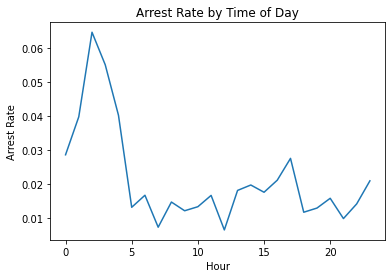

In [101]:
hourly_arrest_rate.plot()
plt.xlabel('Hour')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rate by Time of Day')
plt.show()

In [102]:
print(vt.violation.unique())

INS - Operating Without Liability Insurance'
 'OSC - Operating After Suspension/Revocation/Refusal- Second Offense|INS - Operating Without Liability Insurance|NR - Persons Required To Register|VNI - Vehicle Not Inspected Within 15 Days Of Vt. Registration'
 'NL - Operating Without A License|INS - Operating Without Liability Insurance|NR - Persons Required To Register'
 'NR - Persons Required To Register|INS - Operating Without Liability Insurance|OSC - Operating After Suspension/Revocation/Refusal- First Offense'
 'DR - Failing To Driving To The Right|IR - Illuminations Required'
 'PNA - Misuse Of Number Plates|LBK - Limitations On Backing|NL - Operating Without A License'
 'Operating without displaying validation sticker on registration plate|INS - Operating Without Liability Insurance'
 'NR - Persons Required To Register|INS - Operating Without Liability Insurance|INS - Operating Without Liability Insurance'
 'VNI - Vehicle Not Inspected Within 15 Days Of Vt. Registration|FYL - Vehic

In [118]:
print(pd.crosstab(vt.subject_race, vt.arrest_made))

arrest_made             False  True 
subject_race                        
asian/pacific islander   1228     21
black                    2415     56
hispanic                  214      3
other                     458     13
white                   25426    460


In [119]:
arrest_race=pd.crosstab(vt.subject_race, vt.arrest_made)

In [120]:
print(arrest_race.loc['asian/pacific islander':'hispanic'])

arrest_made             False  True 
subject_race                        
asian/pacific islander   1228     21
black                    2415     56
hispanic                  214      3


In [121]:
races=arrest_race.loc['asian/pacific islander':'hispanic']

<AxesSubplot:xlabel='subject_race'>

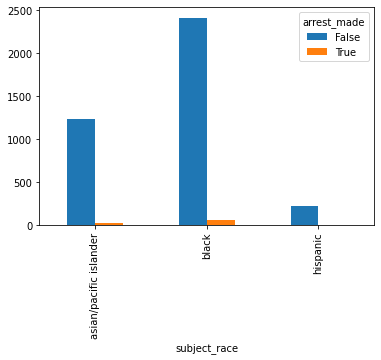

In [122]:
races.plot(kind='bar')

In [38]:
print(vt.violation.value_counts(normalize=True))


DEF - Condition Of Vehicle                                                                                      0.153816
VO - Regulations In Municipalities                                                                              0.127279
VNI - Vehicle Not Inspected Within 15 Days Of Vt. Registration                                                  0.098919
IR - Illuminations Required                                                                                     0.066131
SL1 - 1-10 MPH Over Speed Limit                                                                                 0.061963
                                                                                                                  ...   
FOO - Failure To Obey An Officer|SL1 - 1-10 MPH Over Speed Limit                                                0.000033
SL1 - 1-10 MPH Over Speed Limit|PL - Possession Of License Certificate                                          0.000033
IX4 - Inspection expired within 

In [40]:
search_rate=vt.groupby('violation').search_conducted.mean()

In [42]:
print(vt.violation.unique())

INS - Operating Without Liability Insurance'
 'OSC - Operating After Suspension/Revocation/Refusal- Second Offense|INS - Operating Without Liability Insurance|NR - Persons Required To Register|VNI - Vehicle Not Inspected Within 15 Days Of Vt. Registration'
 'NL - Operating Without A License|INS - Operating Without Liability Insurance|NR - Persons Required To Register'
 'NR - Persons Required To Register|INS - Operating Without Liability Insurance|OSC - Operating After Suspension/Revocation/Refusal- First Offense'
 'DR - Failing To Driving To The Right|IR - Illuminations Required'
 'PNA - Misuse Of Number Plates|LBK - Limitations On Backing|NL - Operating Without A License'
 'Operating without displaying validation sticker on registration plate|INS - Operating Without Liability Insurance'
 'NR - Persons Required To Register|INS - Operating Without Liability Insurance|INS - Operating Without Liability Insurance'
 'VNI - Vehicle Not Inspected Within 15 Days Of Vt. Registration|FYL - Vehic

In [50]:
print(vt[vt['violation'].str.contains('MPH Over Speed Limit', na=False)])

                    raw_row_number        date      time  \
datetime                                                   
2013-10-10 00:19:00          11222  2013-10-10  00:19:00   
2013-10-10 20:08:00          11240  2013-10-10  20:08:00   
2013-10-10 21:05:00          11241  2013-10-10  21:05:00   
2014-10-10 00:43:00          17694  2014-10-10  00:43:00   
2014-10-10 16:47:00          17701  2014-10-10  16:47:00   
...                            ...         ...       ...   
2015-09-09 23:37:00    23854|23855  2015-09-09  23:37:00   
2016-09-09 09:30:00          29408  2016-09-09  09:30:00   
2016-09-09 14:41:00          29411  2016-09-09  14:41:00   
2017-09-09 01:36:00          33082  2017-09-09  01:36:00   
2017-09-09 20:16:00          33085  2017-09-09  20:16:00   

                                                              location  \
datetime                                                                 
2013-10-10 00:19:00          Shelburne Rd at Flynn Ave, Burlington, VT 

In [54]:
#dataframe for violations over the speed limit
over_speed_limit=vt[vt['violation'].str.contains('MPH Over Speed Limit', na=False)]

In [62]:
print(over_speed_limit.mean())

lat                 44.453980
lng                -73.245387
subject_age         34.186605
arrest_made          0.014469
citation_issued      0.313045
warning_issued       0.698898
search_conducted     0.006661
dtype: float64
